In [1]:
import datetime
import io
import pandas as pd
import requests
import sklearn
import yfinance as yf
import numpy as np


from bs4 import BeautifulSoup as Soup


from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

from sklearn import metrics
from sklearn.model_selection import train_test_split

#algorithims
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
import statsmodels.api as sm


from tabulate import tabulate
from pylab import savefig

import warnings
warnings.filterwarnings('ignore')


#plt.rcParams["figure.figsize"]=(10,8)

In [2]:
# 
# 1.3 Use at least one year of daily returns to calculate the correlation matrix for the 30 stocks that are 
# constituents of the Dow Jones Index. Matlab’s “BlueChipStockMoments” can be used to calculate the correlation matrix. Use this correlation matrix for PCA and construct bar graphs to show the weight of each stock for the first and second principal components. Is the first or second principal component similar to the market (equal weight on each stock)? Discuss why?
# 1.4 Calculate the amount of variance explained by each principal component and make a ‘Scree’ plot. 
# How many principal components are required to explain 95% of the variance?
# 1.5 Investigate the scatter plot of the first two principal components and calculate the average of all 30 
# stocks. Based on Euclidean distances away from this average, identify the three most distant stocks. 
# Can you explain why these stocks are unusual?
# 

### Question 1

In [3]:
#1.3
tickers = ["MMM","AXP", "AMGN","AAPL","BA","CAT","CVX","CSCO","KO","DIS","DOW","GS","HD","HON","IBM","INTC",
           "JNJ","JPM","MCD","MRK","MSFT","NKE","PG","CRM","TRV","UNH","VZ","V","WBA","WMT"]

Data = yf.download(tickers= tickers , group_by="ticker", period = "2y")

[*********************100%***********************]  30 of 30 completed


<AxesSubplot:>

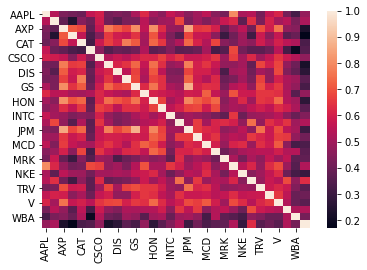

In [4]:
DJI = pd.DataFrame()
for i in Data.columns.levels[0]:
       DJI[i] = (Data[i]["Adj Close"]/Data[i]["Adj Close"].shift(1))-1
        
#PCA Analysis 
DJI.dropna(inplace=True)
pca=PCA()
corrM = DJI.corr()#correlation
pca_model = pca.fit(corrM)
pca_components = pca_model.components_

DF_comp = pd.DataFrame(pca_components)

#correlation matrix
sns.heatmap(corrM)


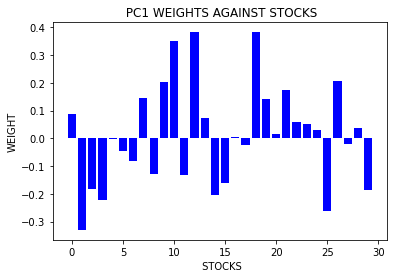

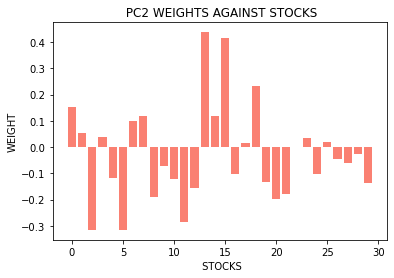

In [5]:
#plotting PC1 vs PC2
#PC1
plt.bar(DF_comp.index,DF_comp[0],color = "blue")
plt.gca().update(dict(title=" PC1 WEIGHTS AGAINST STOCKS",xlabel=" STOCKS",ylabel="WEIGHT"))
plt.show()

#PC2
plt.bar(DF_comp.index,DF_comp[1],color = "salmon")
plt.gca().update(dict(title=" PC2 WEIGHTS AGAINST STOCKS",xlabel=" STOCKS",ylabel="WEIGHT"))
plt.show()

In [6]:
#1.4
print("Variance: ", pca_model.explained_variance_) #Eigenvalues (sum of squares of the distance between the projected and original point

Variance:  [2.44230212e-01 7.65208326e-02 6.80361736e-02 2.33276794e-02
 1.73945274e-02 1.45478820e-02 1.17014043e-02 1.07605473e-02
 9.12583981e-03 6.90828640e-03 6.36496365e-03 6.15130214e-03
 4.94495432e-03 4.01748408e-03 3.55549179e-03 3.51436521e-03
 3.21488661e-03 2.50695236e-03 2.30661930e-03 1.89428514e-03
 1.84406274e-03 1.60477241e-03 1.40244892e-03 1.24345412e-03
 1.00318339e-03 8.43310409e-04 6.98459105e-04 5.58416431e-04
 2.84905349e-04 3.79671017e-33]


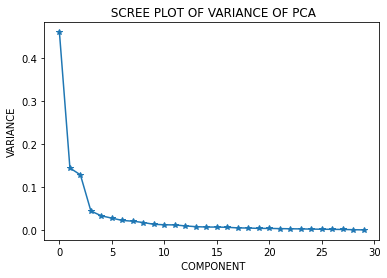

In [25]:
#cree plot
y1 = pca_model.explained_variance_ratio_

#ag = plt.subplots()
plt.plot(y1, marker = "*")
#plt.axhline(y=0.95,color="salmon")
plt.gca().update(dict(title=" SCREE PLOT OF VARIANCE OF PCA",xlabel=" COMPONENT",ylabel="VARIANCE"))
plt.plot()
plt.show()


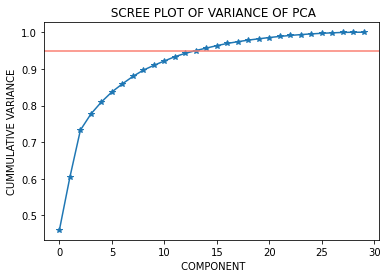

In [7]:
#scree plot
#95% of variance
y = np.cumsum(pca_model.explained_variance_ratio_)

#ag = plt.subplots()
plt.plot(y, marker = "*")
plt.axhline(y=0.95,color="salmon")
plt.gca().update(dict(title=" SCREE PLOT OF VARIANCE OF PCA",xlabel=" COMPONENT",ylabel="CUMMULATIVE VARIANCE"))
plt.plot()
plt.show()

In [8]:
#Explained variance ratio (i.e. how much of the change in the variables in the time series is explained by 
#change in the respective principal component); eigenvalue/(n variables)

print(pca_model.explained_variance_ratio_)


[4.60370718e-01 1.44240757e-01 1.28247287e-01 4.39723671e-02
 3.27884541e-02 2.74225651e-02 2.20569923e-02 2.02834894e-02
 1.72020873e-02 1.30220285e-02 1.19978723e-02 1.15951231e-02
 9.32117347e-03 7.57290434e-03 6.70205498e-03 6.62453192e-03
 6.06001873e-03 4.72557203e-03 4.34794686e-03 3.57070243e-03
 3.47603387e-03 3.02497476e-03 2.64359766e-03 2.34389456e-03
 1.89098742e-03 1.58962896e-03 1.31658617e-03 1.05260758e-03
 5.37042814e-04 7.15674844e-33]


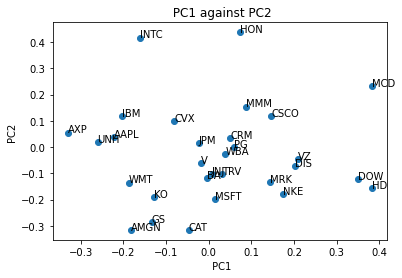

In [9]:
#1.5
#components plot
plt.scatter(DF_comp[0],DF_comp[1])
plt.gca().update(dict(title=" PC1 against PC2",xlabel=" PC1",ylabel="PC2"),)

#annotate
for i, txt in enumerate (tickers):
       plt.annotate(txt, (DF_comp[0][i],DF_comp[1][i]))
plt.show()



In [10]:
#1.5
#euclidean distance 
PC_mean = DF_comp.iloc[:, 0:2].mean(axis=0)
Edistance = []
Erange = len(corrM)

for x in range(Erange):    
    distance = np.linalg.norm(DF_comp.iloc[x, 0:2]- PC_mean)
    Edistance.append(distance)
    

Edistance = pd.DataFrame({"Euclidean distance":Edistance}, index = corrM.index)
#Edistance = pd.DataFrame(Edistance)
furthest_stock = list(Edistance.sort_values(by = "Euclidean distance", ascending = False).iloc[:3,:].index)    


In [11]:
print("The furthest stocks are : ",furthest_stock)

The furthest stocks are :  ['JNJ', 'IBM', 'MCD']


### Question 2

In [12]:
#2.3
#pairwise distances between the 30 stocks
#D= sklearn.metrics.pairwise_distances(DJI, metric='correlation')
D = (2*(1-corrM))**0.5
print(D)

          AAPL      AMGN       AXP        BA       CAT       CRM      CSCO  \
AAPL  0.000000  0.958453  1.063081  1.082354  1.095548  0.930577  0.896171   
AMGN  0.958453  0.000000  1.115930  1.228641  1.048037  1.093134  0.906334   
AXP   1.063081  1.115930  0.000000  0.762516  0.793630  1.115291  0.930741   
BA    1.082354  1.228641  0.762516  0.000000  0.933450  1.150140  1.051806   
CAT   1.095548  1.048037  0.793630  0.933450  0.000000  1.168853  0.911883   
CRM   0.930577  1.093134  1.115291  1.150140  1.168853  0.000000  1.031307   
CSCO  0.896171  0.906334  0.930741  1.051806  0.911883  1.031307  0.000000   
CVX   1.079087  1.087613  0.678075  0.828138  0.814454  1.137511  0.959440   
DIS   1.059972  1.131103  0.752159  0.902536  0.877576  1.098138  0.916025   
DOW   1.079467  1.070854  0.813003  0.919193  0.669421  1.111009  0.950786   
GS    0.978943  1.065271  0.627257  0.841945  0.757483  1.087843  0.901587   
HD    0.863664  0.949135  0.938176  0.983126  0.995840  0.971465

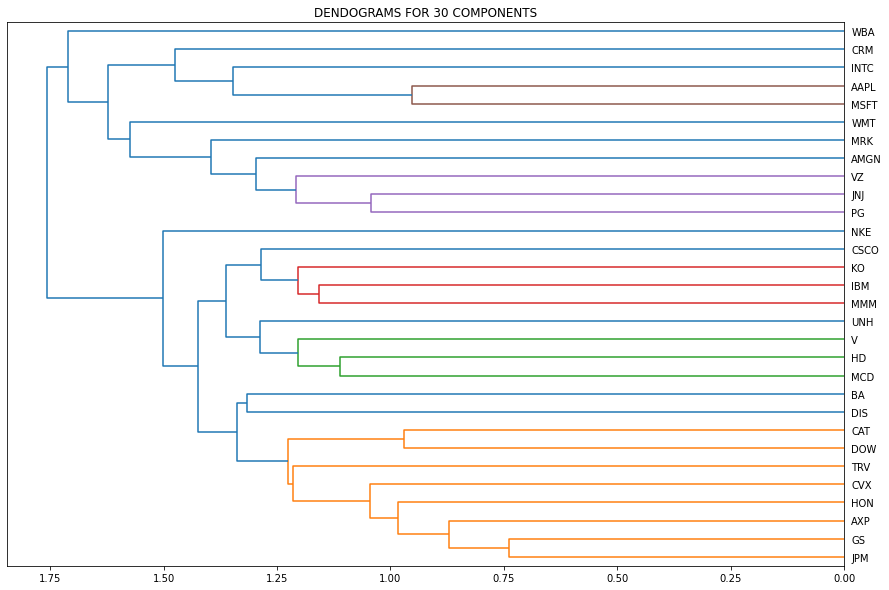

In [13]:
#2.4
Z = linkage(D,"average")

fig = plt.figure(figsize=(15, 10))
plt.title("DENDOGRAMS FOR 30 COMPONENTS")

dn = dendrogram(Z,labels=corrM.columns,count_sort="descending",orientation="left")

plt.show()

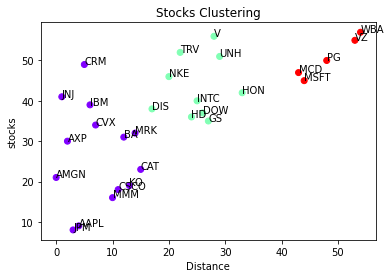

In [14]:
#2.5
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(Z)
#print(cluster.labels_)
plt.scatter(Z[:,0],Z[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Stocks Clustering')  
plt.xlabel('Distance')  
plt.ylabel('stocks')  
#plt.legend()
#annotate
for i, txt in enumerate (tickers):
    try:
        plt.annotate(txt, (Z[:,0][i],Z[:,1][i]))
    except:
        pass
plt.show()

### Question 3

optimum number of trees: count    36.000000
score     0.212034
Name: 34, dtype: float64


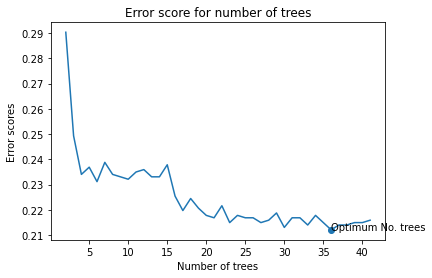

In [15]:
#3.4
#data set
Titanic = pd.read_csv("titanic3.csv")

#function to fill age nan values with mean
def add_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        return int(Titanic[Titanic["pclass"] == pclass]["age"].mean())
    else:
        return age
Titanic["age"] = Titanic[["age", "pclass"]].apply(add_age,axis=1) 

#change sex values from string to numeric
pd.get_dummies(Titanic["sex"])
sex_new = pd.get_dummies(Titanic["sex"],drop_first=True)
Titanic = pd.concat([Titanic,sex_new],axis=1)

#creating variables
x_survived = Titanic[["pclass","male","age"]]#predictor
y_survived = Titanic["survived"]#dependent


#random forest regressor moder
XTrain, XTest, yTrain, yTest = train_test_split(x_survived,y_survived,test_size=0.2,random_state=45)

score = []
count = range(2,42)

for i in count:
    clf = RandomForestClassifier(n_estimators= 10,max_leaf_nodes= i,oob_score=True,random_state=42)
    clf.fit(XTrain,yTrain);
    oob_score = clf.oob_score_
    error = 1-oob_score 
    score.append(error)

#dataframe
Tscore = pd.DataFrame(score)
graph = pd.DataFrame({"count":count,"score":score})
#optimum leaves

a = graph.iloc[graph["score"].idxmin()]
print("optimum number of trees:",a)

#plotting graph

plt.plot(count,Tscore[0])
plt.scatter(36,0.2120)
plt.annotate("Optimum No. trees",(36,0.2120))
plt.xlabel('Number of trees')
plt.ylabel('Error scores')
plt.title('Error score for number of trees')
plt.show()


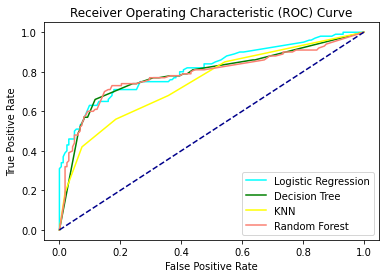

In [16]:
#3.5
#ROC curve for Logistic Regression, Decision Tree, Random Forest and KNN,
#KNN
knn = KNeighborsClassifier()
knn.fit(XTrain,yTrain)
y_pred_knn = knn.predict_proba(XTest)
probs3 = y_pred_knn[:, 1]

#Decision tree
dec = DecisionTreeClassifier()
dec.fit(XTrain,yTrain)
y_pred_dec = dec.predict_proba(XTest)
probs2 = y_pred_dec[:, 1]

#RandomForest
forest = RandomForestClassifier()
forest.fit(XTrain,yTrain)
y_pred_forest = forest.predict_proba(XTest)
probs4=y_pred_forest[:,1]

#logistic  regression
logi = LogisticRegression()
logi.fit(XTrain,yTrain)
y_pred_log = logi.predict_proba(XTest)
probs1 = y_pred_log[:, 1]

FP, TP, thresholds = roc_curve(yTest, probs1)
FP1, TP1, thresholds1 = roc_curve(yTest, probs2)
FP2, TP2, thresholds2 = roc_curve(yTest, probs3)
FP3, TP3, thresholds3 = roc_curve(yTest, probs4)

plt.plot(FP, TP, c='cyan', label='Logistic Regression')
plt.plot(FP1, TP1, c='green', label='Decision Tree')
plt.plot(FP2, TP2, c='yellow', label='KNN')
plt.plot(FP3, TP3, c='salmon', label='Random Forest')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [17]:
#AUC scores
log_auc = roc_auc_score(yTest, probs1)
dec_auc = roc_auc_score(yTest, probs2)
forest_auc = roc_auc_score(yTest, probs4)
knn_auc = roc_auc_score(yTest,probs3)

print('The Logistic AUC Score is:{:.2f}'.format(log_auc))
print('The Decision Tree AUC Score is:{:.2f}'.format(dec_auc))
print('The Random Forest AUC Score is:{:.2f}'.format(forest_auc))
print('The KNN AUC Score is:{:.2f}'.format(knn_auc))


The Logistic AUC Score is:0.81
The Decision Tree AUC Score is:0.79
The Random Forest AUC Score is:0.79
The KNN AUC Score is:0.74


### Question 4

In [18]:

Wine_Red = pd.read_csv("winequality-red.csv", sep=";")

x_red = Wine_Red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]#independent
y_red = Wine_Red[["quality"]]#dependent



In [19]:
#4.2
#split data
X_train, X_test, y_train, y_test = train_test_split(x_red,y_red,test_size=0.2,random_state=32)
#y_train = np.ravel(y_train)
#random forest model

scores_error = []
leaves_range = range(3,52)

for i in leaves_range:
    RF = RandomForestRegressor(max_leaf_nodes= i,oob_score=True, random_state=32)
    RF.fit(X_train,y_train)
    oob_score = RF.oob_score_
    err = 1-oob_score 
    scores_error.append(err)

#dataframe
DFscoreE = pd.DataFrame(scores_error)
df = pd.DataFrame({"scores_error":scores_error,"leaves":leaves_range})
#optimum number of leaves
optimum_leave = df.loc[df["scores_error"].idxmin()]
print("Optimum number of leaves is",optimum_leave)



Optimum number of leaves is scores_error     0.583524
leaves          50.000000
Name: 47, dtype: float64


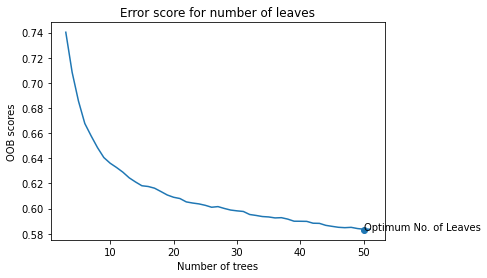

In [30]:
#plotting number of leaves
plt.plot(leaves_range,DFscoreE[0])
plt.xlabel('Number of trees')
plt.ylabel('OOB scores')
plt.scatter(50,0.583)
plt.annotate("Optimum No. of Leaves",(50,0.583))
plt.title('Error score for number of leaves')
plt.show()

In [29]:
#4.3
#number of trees

scores_trees = []
trees_range = range(3,52)

for i in trees_range:
    RF1 = RandomForestRegressor(n_estimators= i,max_leaf_nodes= 50,oob_score=True,random_state=32)
    RF1.fit(X_train,y_train)
    #oob_score = RF1.oob_score_
    tree_error = 1-(RF1.oob_score_) 
    scores_trees.append(tree_error)

#dataframe
DFscoreT = pd.DataFrame(scores_trees)
df1 = pd.DataFrame({"scores_trees":scores_trees,"Trees":trees_range})
#optimum number of leaves
optimum_trees = df1.loc[df1["scores_trees"].idxmin()]
print("Optimum number of trees is",optimum_trees)



Optimum number of trees is scores_trees     0.589462
Trees           50.000000
Name: 47, dtype: float64


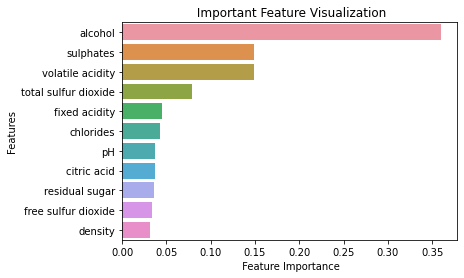

In [22]:
#4.4
#bargraph of importance of each features

Fimportant = pd.Series(RF.feature_importances_, index=x_red.columns).sort_values(ascending=False)

sns.barplot(x=Fimportant, y=Fimportant.index)
plt.gca().update(dict(title=" Important Feature Visualization",xlabel=" Feature Importance",ylabel="Features"),)
plt.show()



In [31]:
#4.5
#performanceof RFmodel
RF.fit(X_train,y_train)
y_predict = RF.predict(X_test)
Acc = metrics.mean_squared_error(y_test,y_predict)
print("Mean squared error {:.2f}".format(Acc),"%")

Mean squared error 0.35 %
